In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io

In [2]:
RECOVERED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
CONFIRMED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

global_recovered_csv = requests.get(RECOVERED_URL).content.decode('utf-8')
global_confirmed_csv = requests.get(CONFIRMED_URL).content.decode('utf-8')

df_recovered = pd.read_csv(io.StringIO(global_recovered_csv)).drop(['Lat', 'Long'], axis=1)
df_confirmed = pd.read_csv(io.StringIO(global_confirmed_csv)).drop(['Lat', 'Long'], axis=1)

In [3]:
df_rec = df_recovered.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)
df_con = df_confirmed.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)

df_rec.index = pd.to_datetime(df_rec.index)
df_con.index = pd.to_datetime(df_con.index)

df_rec = df_rec.asfreq('d')
df_con = df_con.asfreq('d')

In [4]:
def decumulation(df):
    return df.sub(df.shift()).iloc[1:]

In [63]:
df_daily_rec = decumulation(df_rec)
df_daily_con = decumulation(df_con)

In [6]:
date = df2.columns.drop('Country/Region').to_numpy()
len(date)

NameError: name 'df2' is not defined

In [ ]:
country = df2.loc[df2['Country/Region'] == 'China'].to_numpy()
country_recovered = np.delete(country[0], 0)
len(country_recovered)

In [ ]:
country_label = country[0][0]
country_label

In [69]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

def simple_smooth(df, name=None):
    model = SimpleExpSmoothing(df)

    fitted02 = model.fit(smoothing_level=0.2)
    fitted005 = model.fit(smoothing_level=0.05)

    df.plot(label='Actual', legend=True, color='c')
    fitted02.predict(start=0, end=130) \
            .plot(label='Alpha = 0.2', legend=True, color='orange')
    fitted005.predict(start=0, end=130) \
             .plot(figsize=(15, 8), grid=True, label='Alpha = 0.05', legend=True) \
             .set_title(name)

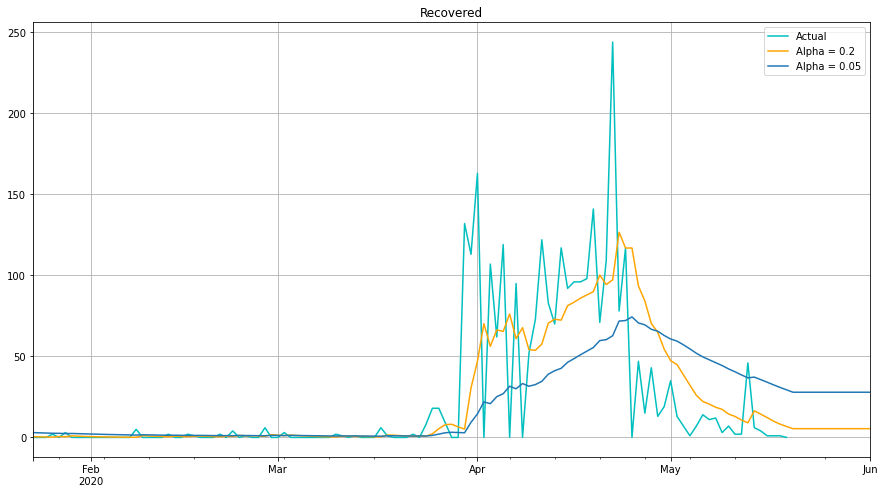

In [71]:
simple_smooth(df_daily_rec.Thailand, 'Recovered')

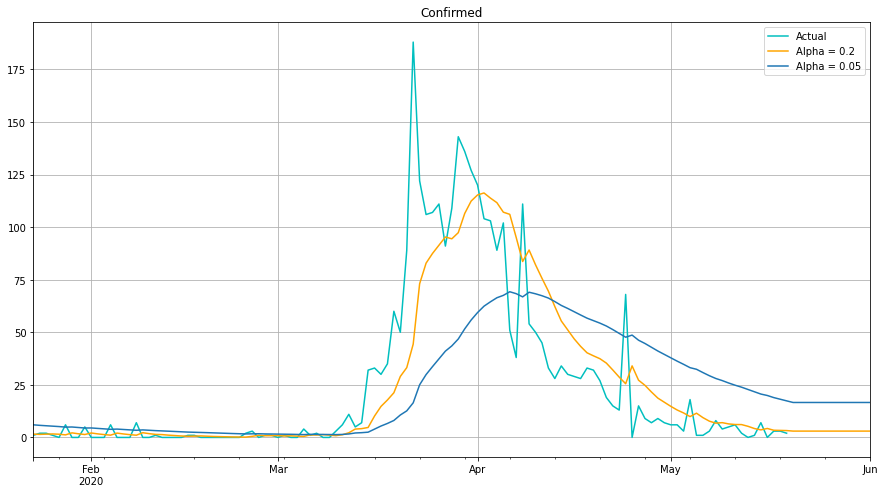

In [70]:
simple_smooth(df_daily_con.Thailand, 'Confirmed')

In [74]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, title, x, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(x, double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(x, series, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title(title)
    plt.xticks(rotation=270)
    plt.grid(True)
    
def double_smooth(df, name):
    plot_double_exponential_smoothing(df,
                                      name,
                                      df.index,
                                      alphas=[0.9, 0.02],
                                      betas=[0.9, 0.02])

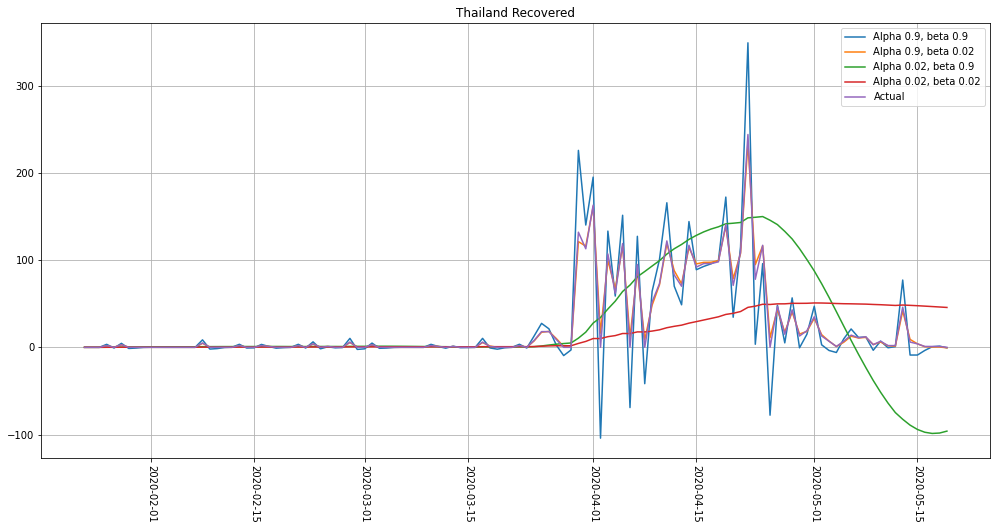

In [75]:
double_smooth(df_daily_rec.Thailand, 'Thailand Recovered')

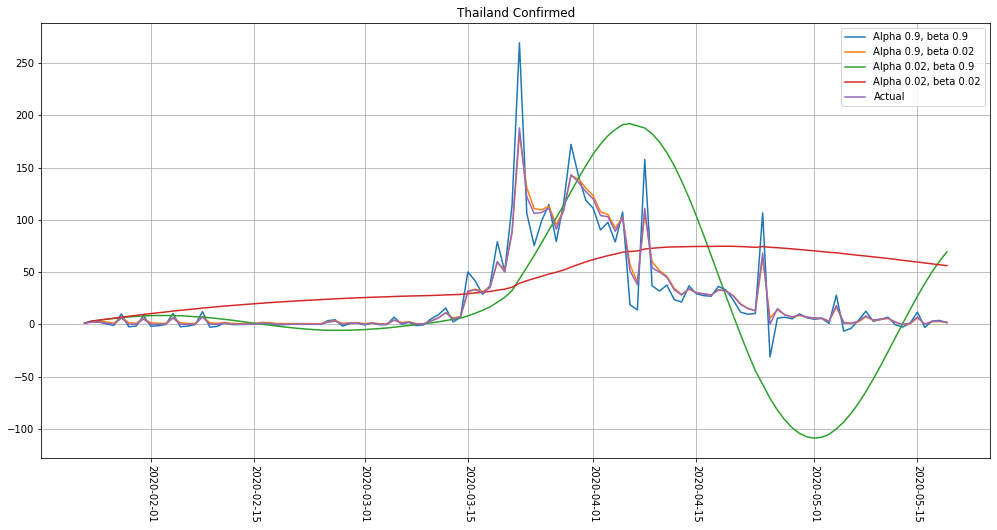

In [77]:
double_smooth(df_daily_con.Thailand, 'Thailand Confirmed')